In [1]:
import numpy as np
import pandas as pd 
import matplotlib as plt
import seaborn as sns
df_USA=pd.read_csv('US_Accidents.csv')

In [40]:
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans

In [22]:
df_USA.head(5)


,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day
5,A-6,Source2,3,2016-02-08 07:44:26,2016-02-08 08:14:26,40.100590,-82.925194,NaN,NaN,0.01,...,False,False,False,False,False,False,Day,Day,Day,Day
6,A-7,Source2,2,2016-02-08 07:59:35,2016-02-08 08:29:35,39.758274,-84.230507,NaN,NaN,0.00,...,False,False,False,False,False,False,Day,Day,Day,Day
7,A-8,Source2,3,2016-02-08 07:59:58,2016-02-08 08:29:58,39.770382,-84.194901,NaN,NaN,0.01,...,False,False,False,False,False,False,Day,Day,Day,Day
8,A-9,Source2,2,2016-02-08 08:00:40,2016-02-08 08:30:40,39.778061,-84.172005,NaN,NaN,0.00,...,False,False,False,False,False,False,Day,Day,Day,Day
9,A-10,Source2,3,2016-02-08 08:10:04,2016-02-08 08:40:04,40.100590,-82.925194,NaN,NaN,0.01,...,False,False,False,False,False,False,Day,Day,Day,Day


In [32]:
df_USA['Start_Time'] = pd.to_datetime(df_USA['Start_Time'], errors='coerce')
df_USA['h'] = df_USA['Start_Time'].dt.hour

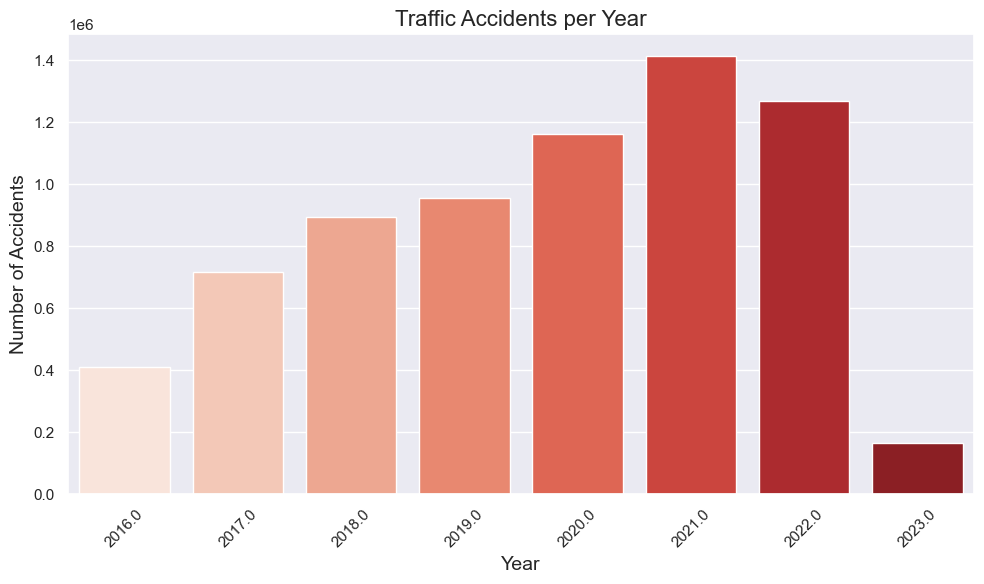

In [50]:
df_USA['Year'] = pd.to_datetime(df_USA['Start_Time']).dt.year
plt.figure(figsize=(10, 6))
sns.set_theme(style="darkgrid")
sns.countplot(x='Year', data=df_USA, palette='Reds') 
plt.title('Traffic Accidents per Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Accidents', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

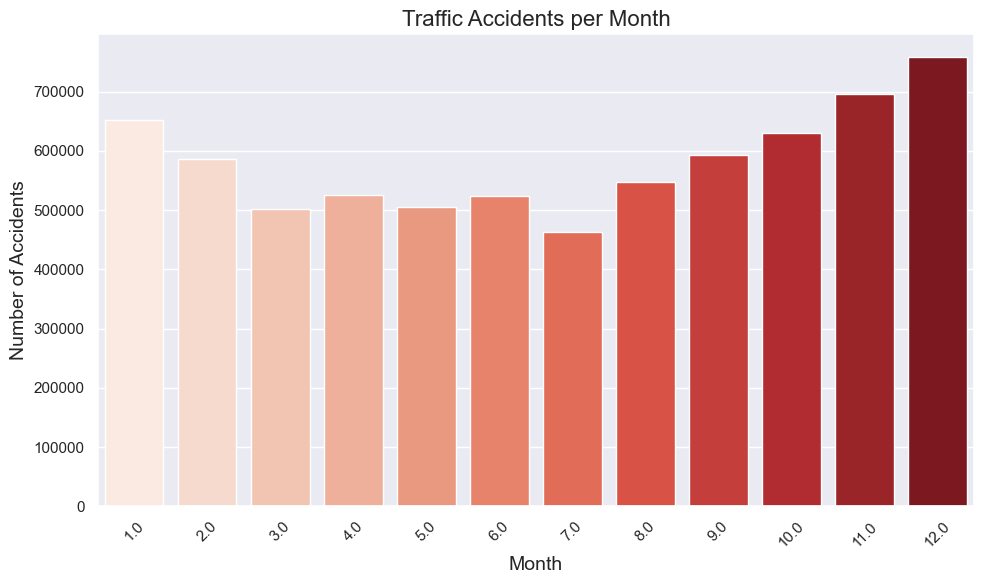

In [66]:
df_USA['Month'] = pd.to_datetime(df_USA['Start_Time']).dt.month
plt.figure(figsize=(10, 6))
sns.set_theme(style="darkgrid")
sns.countplot(x='Month', data=df_USA, palette='Reds')
plt.title('Traffic Accidents per Month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Accidents', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

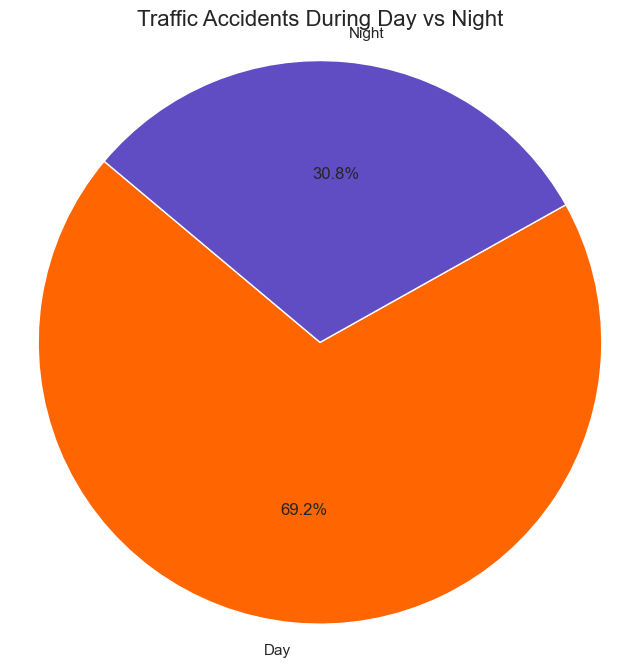

In [72]:
sunrise_sunset_counts = df_USA['Sunrise_Sunset'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(sunrise_sunset_counts, labels=sunrise_sunset_counts.index, autopct='%1.1f%%', startangle=140, colors=['#FF6500','#604CC3'])
plt.title('Traffic Accidents During Day vs Night', fontsize=16)
plt.axis('equal') 
plt.show()

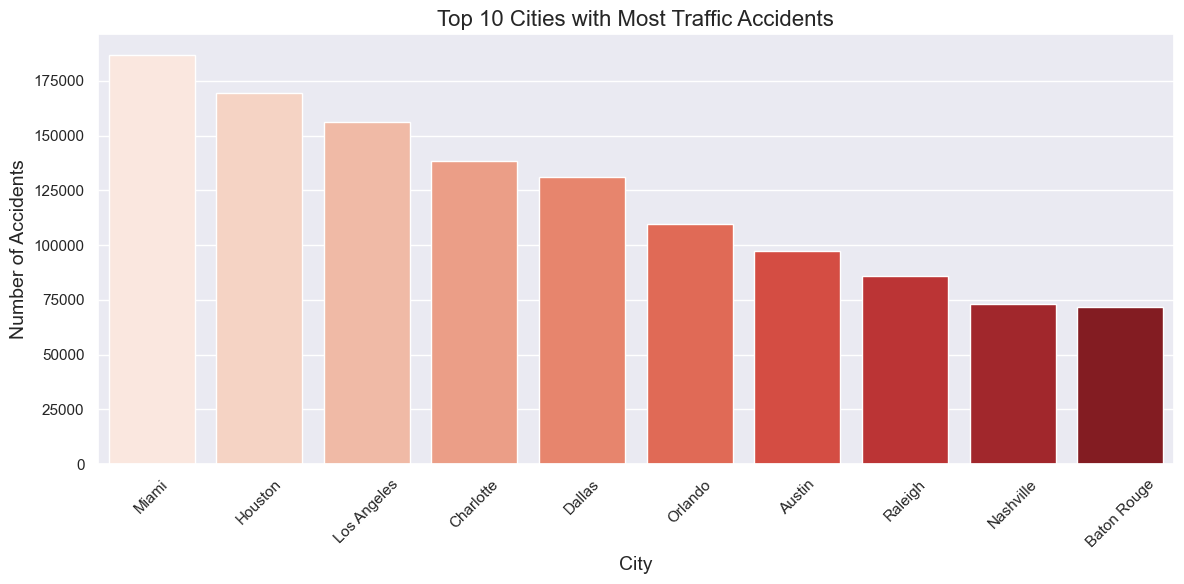

In [91]:
top_cities = df_USA['City'].value_counts().nlargest(10)  # أعلى 10 مدن
plt.figure(figsize=(12, 6))
sns.barplot(x=top_cities.index, y=top_cities.values, palette='Reds')
plt.title('Top 10 Cities with Most Traffic Accidents', fontsize=16)
plt.xlabel('City', fontsize=14)
plt.ylabel('Number of Accidents', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


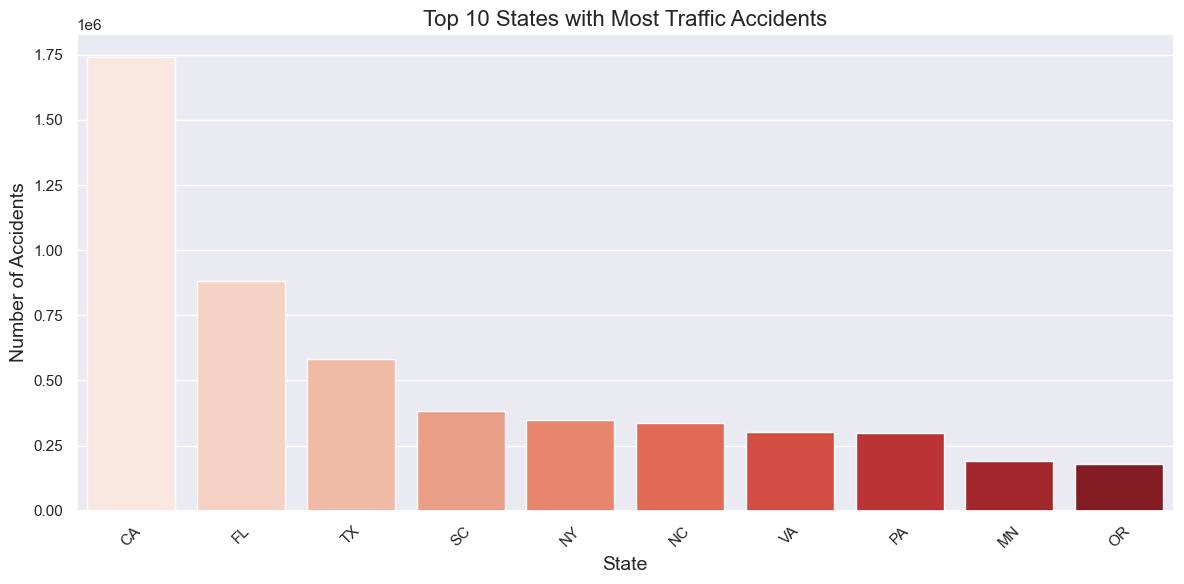

In [95]:
top_States = df_USA['State'].value_counts().nlargest(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_States.index, y=top_States.values, palette='Reds')
plt.title('Top 10 States with Most Traffic Accidents', fontsize=16)
plt.xlabel('State', fontsize=14)
plt.ylabel('Number of Accidents', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


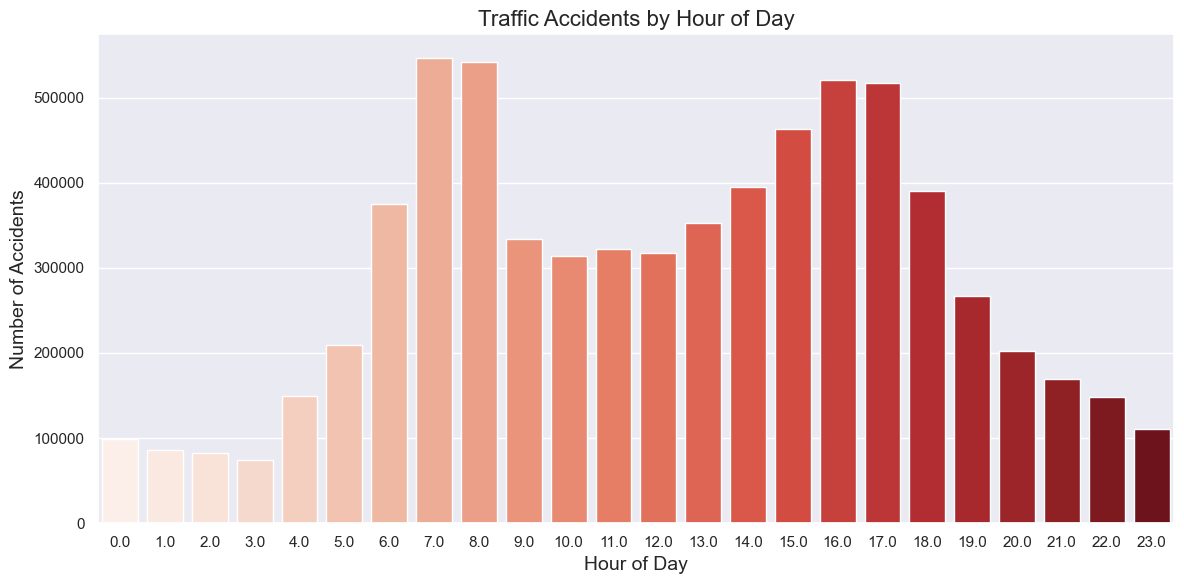

In [99]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df_USA, x='h', palette='Reds')
plt.title('Traffic Accidents by Hour of Day', fontsize=16)
plt.xlabel('Hour of Day', fontsize=14)
plt.ylabel('Number of Accidents', fontsize=14)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


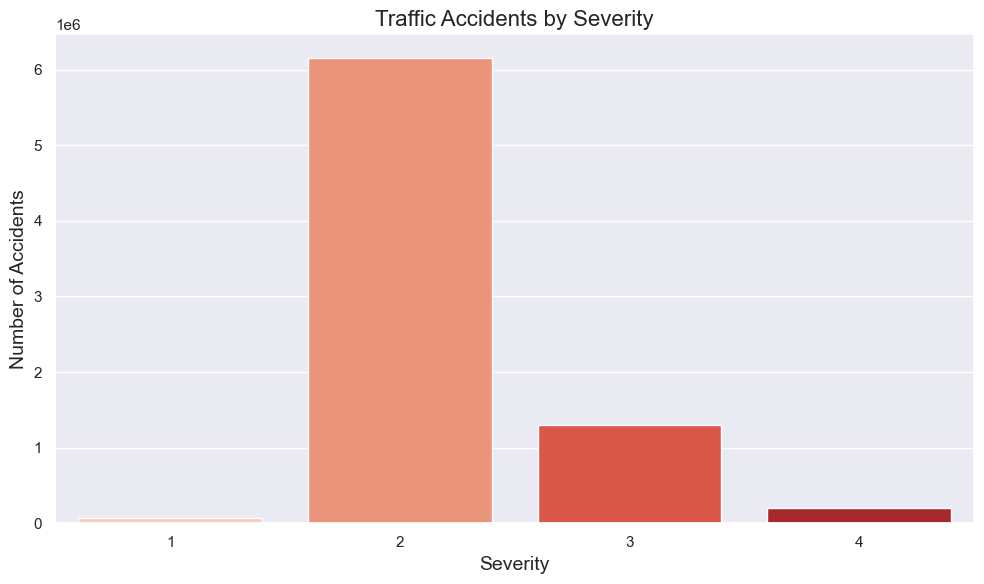

In [107]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df_USA, x='Severity', palette='Reds')
plt.title('Traffic Accidents by Severity', fontsize=16)
plt.xlabel('Severity', fontsize=14)
plt.ylabel('Number of Accidents', fontsize=14)
plt.tight_layout()
plt.show()


C:\Users\FreeComp\AppData\Local\Temp\ipykernel_14484\4207072264.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df_USA, x='Distance(mi)', y='Severity', palette='viridis', alpha=0.6)


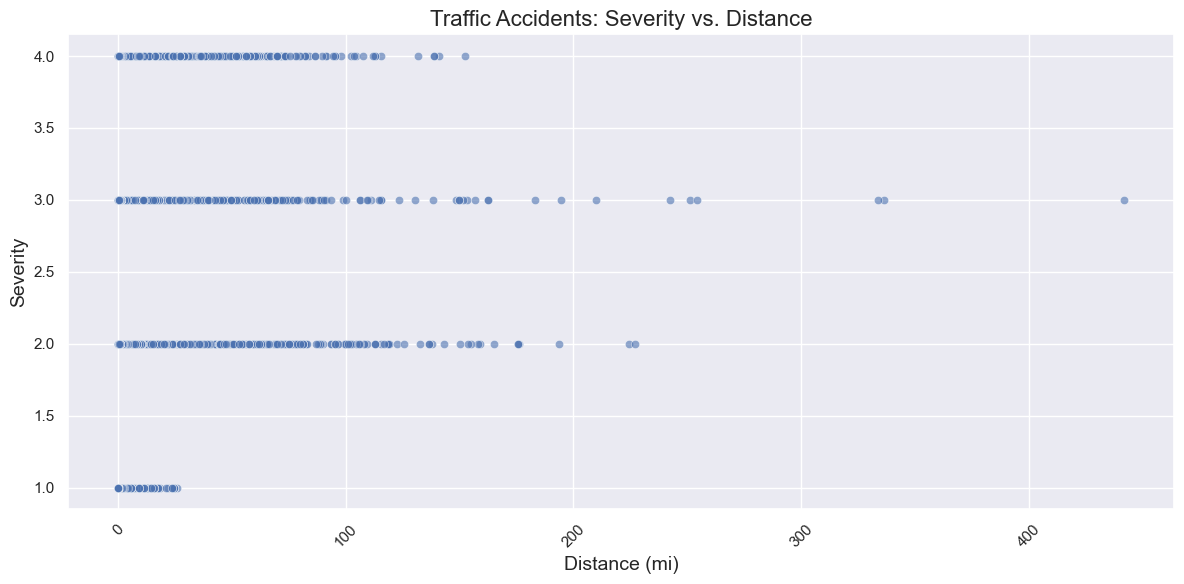

In [109]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_USA, x='Distance(mi)', y='Severity', palette='viridis', alpha=0.6)
plt.title('Traffic Accidents: Severity vs. Distance', fontsize=16)
plt.xlabel('Distance (mi)', fontsize=14)
plt.ylabel('Severity', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()
plt.show()


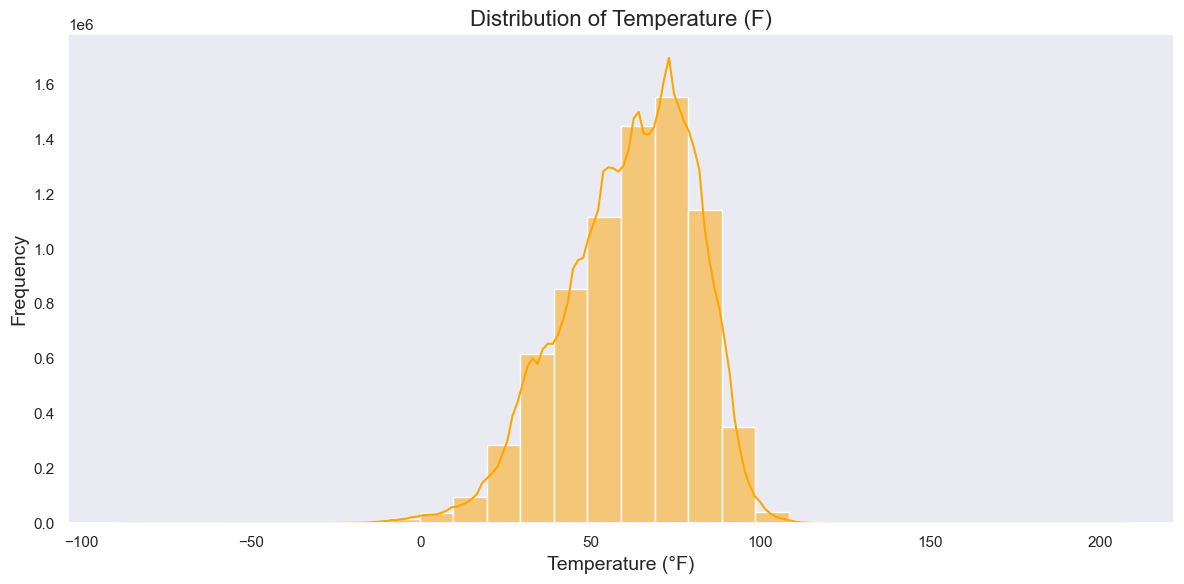

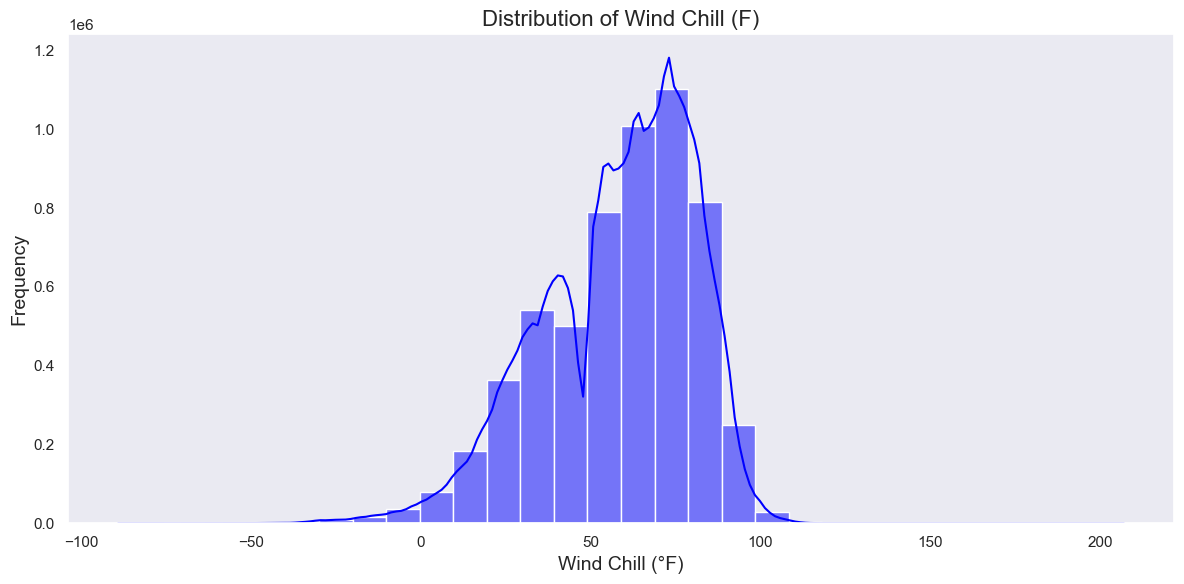

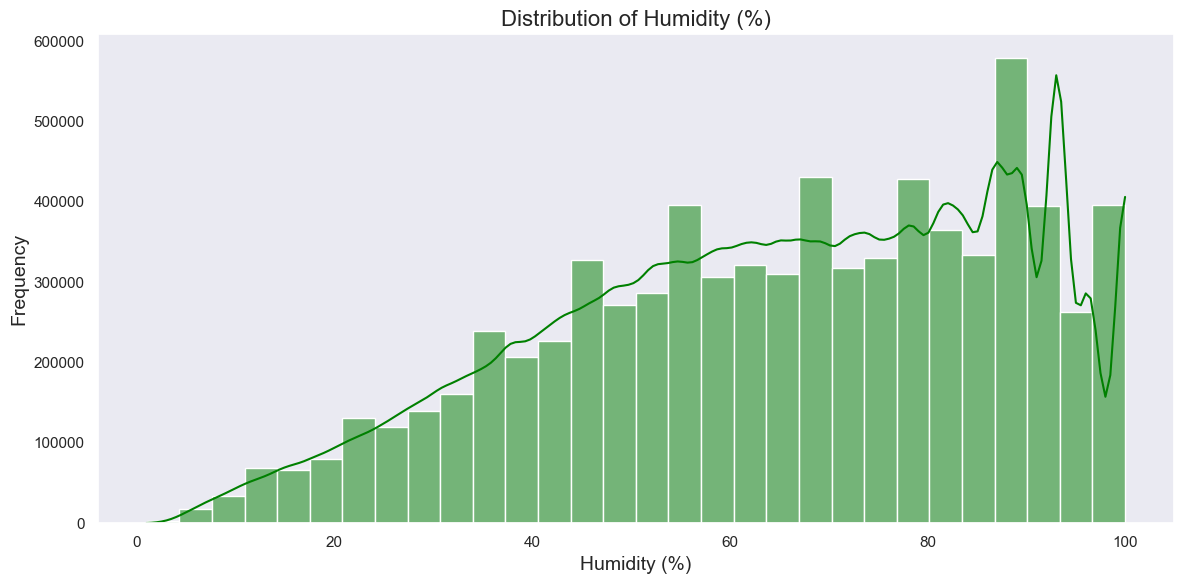

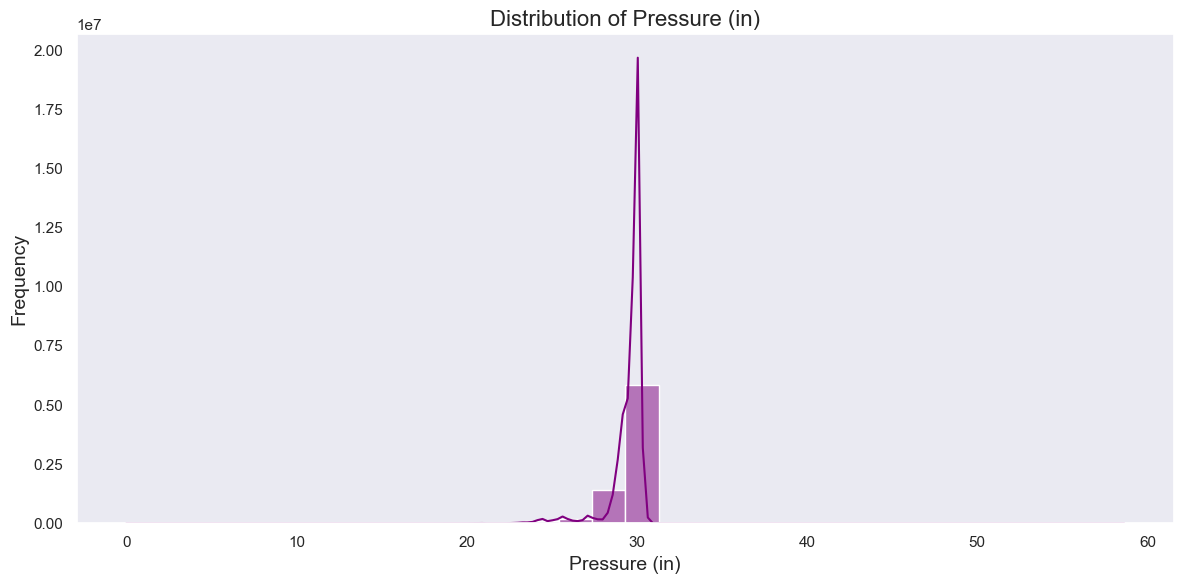

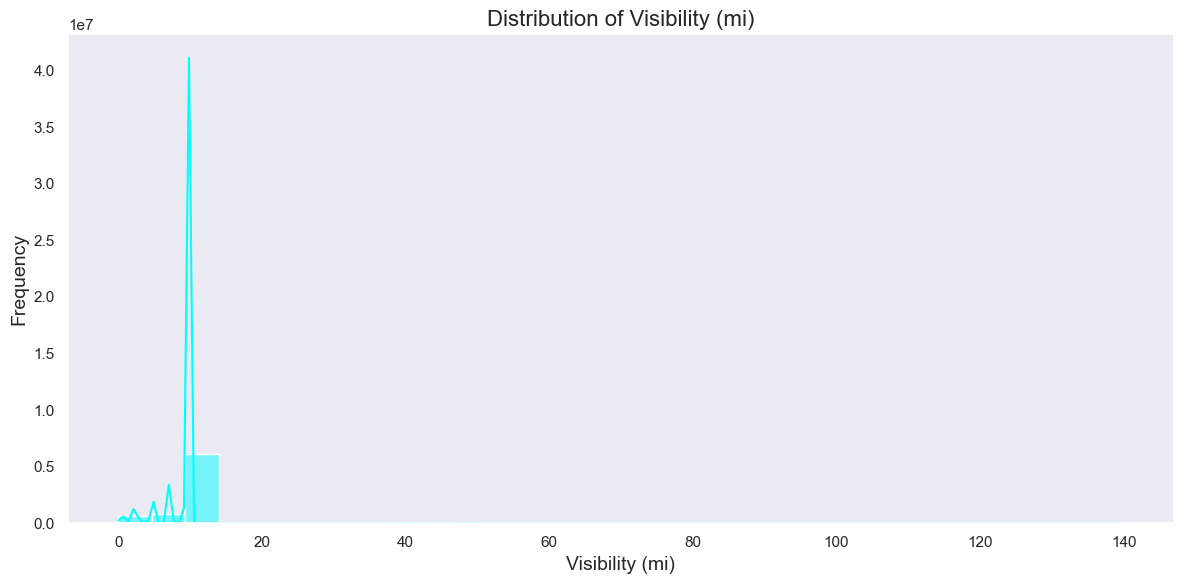

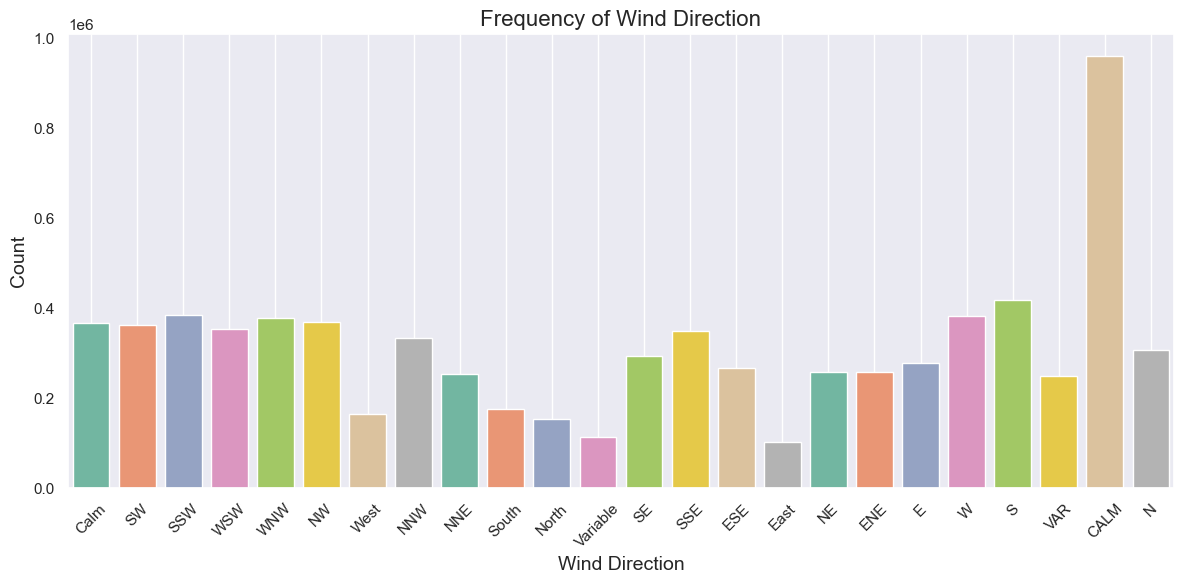

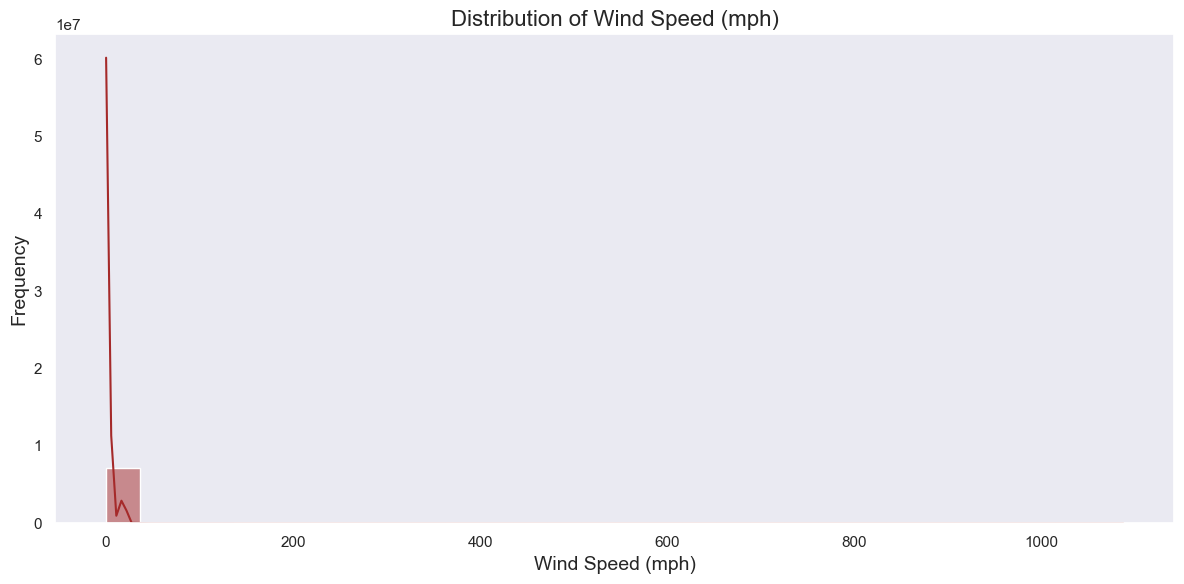

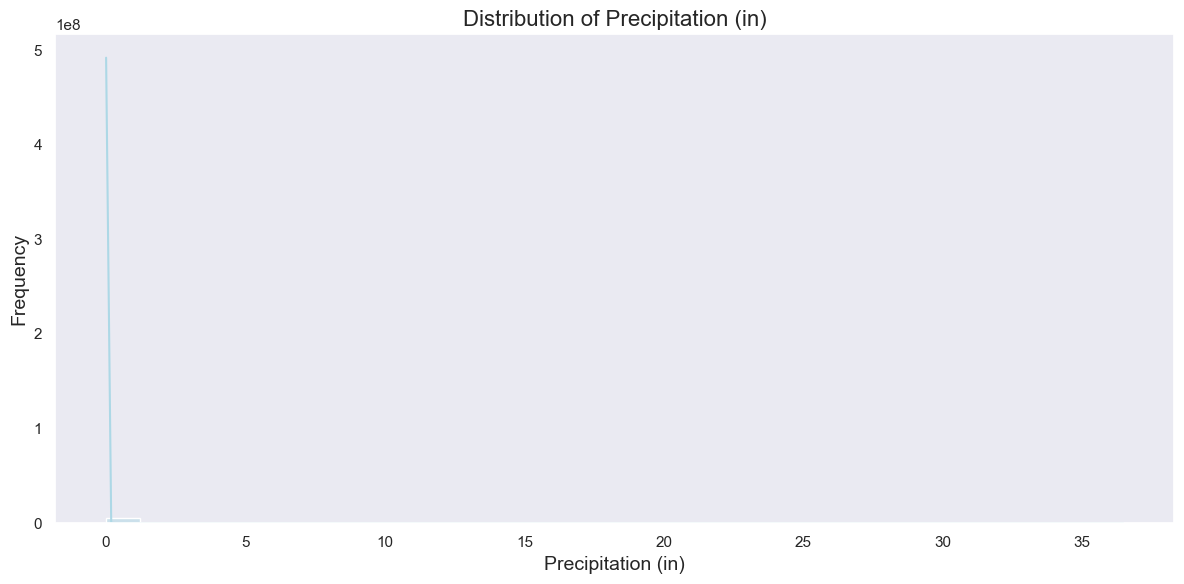

In [117]:
#Temperature
plt.figure(figsize=(12, 6))
sns.histplot(df_USA['Temperature(F)'], bins=30, color='orange', kde=True)
plt.title('Distribution of Temperature (F)', fontsize=16)
plt.xlabel('Temperature (°F)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid()
plt.tight_layout()
plt.show()
#Wind Chill
plt.figure(figsize=(12, 6))
sns.histplot(df_USA['Wind_Chill(F)'], bins=30, color='blue', kde=True)
plt.title('Distribution of Wind Chill (F)', fontsize=16)
plt.xlabel('Wind Chill (°F)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid()
plt.tight_layout()
plt.show()
#Humidity
plt.figure(figsize=(12, 6))
sns.histplot(df_USA['Humidity(%)'], bins=30, color='green', kde=True)
plt.title('Distribution of Humidity (%)', fontsize=16)
plt.xlabel('Humidity (%)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid()
plt.tight_layout()
plt.show()
#Pressure
plt.figure(figsize=(12, 6))
sns.histplot(df_USA['Pressure(in)'], bins=30, color='purple', kde=True)
plt.title('Distribution of Pressure (in)', fontsize=16)
plt.xlabel('Pressure (in)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid()
plt.tight_layout()
plt.show()
#Visibility
plt.figure(figsize=(12, 6))
sns.histplot(df_USA['Visibility(mi)'], bins=30, color='cyan', kde=True)
plt.title('Distribution of Visibility (mi)', fontsize=16)
plt.xlabel('Visibility (mi)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid()
plt.tight_layout()
plt.show()
#Wind Direction
plt.figure(figsize=(12, 6))
sns.countplot(data=df_USA, x='Wind_Direction', palette='Set2')
plt.title('Frequency of Wind Direction', fontsize=16)
plt.xlabel('Wind Direction', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()
#Wind Speed
plt.figure(figsize=(12, 6))
sns.histplot(df_USA['Wind_Speed(mph)'], bins=30, color='brown', kde=True)
plt.title('Distribution of Wind Speed (mph)', fontsize=16)
plt.xlabel('Wind Speed (mph)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid()
plt.tight_layout()
plt.show()
#Precipitation
plt.figure(figsize=(12, 6))
sns.histplot(df_USA['Precipitation(in)'], bins=30, color='lightblue', kde=True)
plt.title('Distribution of Precipitation (in)', fontsize=16)
plt.xlabel('Precipitation (in)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid()
plt.tight_layout()
plt.show()


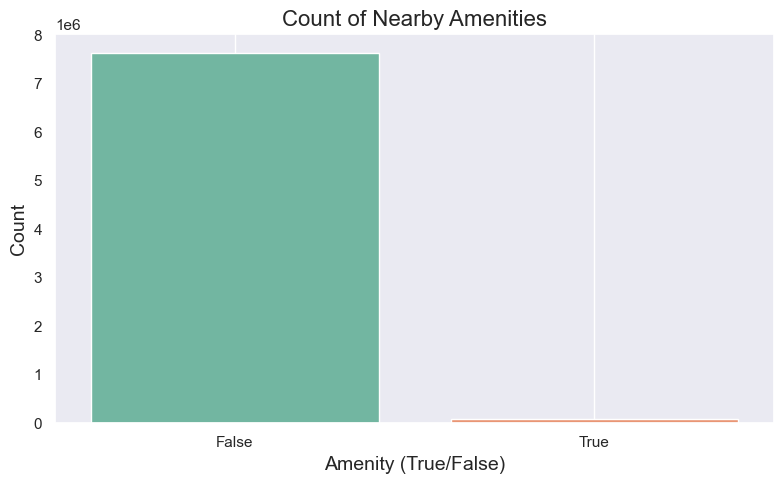

In [119]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df_USA, x='Amenity', palette='Set2')
plt.title('Count of Nearby Amenities', fontsize=16)
plt.xlabel('Amenity (True/False)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=0)
plt.grid()
plt.tight_layout()
plt.show()


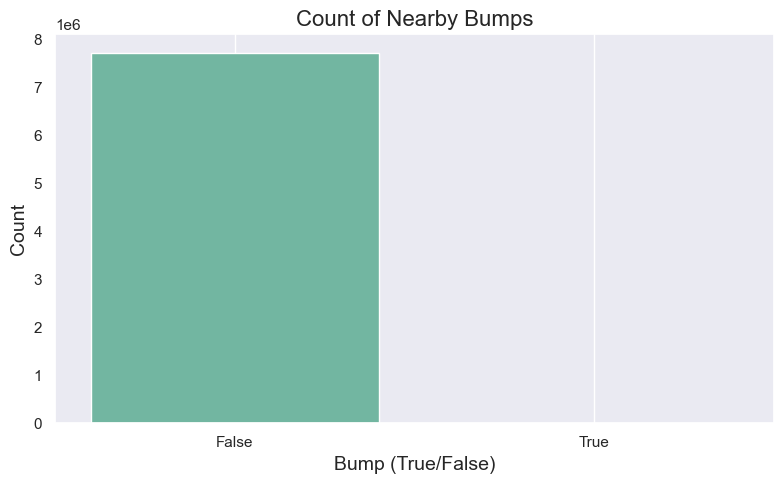

In [121]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df_USA, x='Bump', palette='Set2')
plt.title('Count of Nearby Bumps', fontsize=16)
plt.xlabel('Bump (True/False)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=0)
plt.grid()
plt.tight_layout()
plt.show()


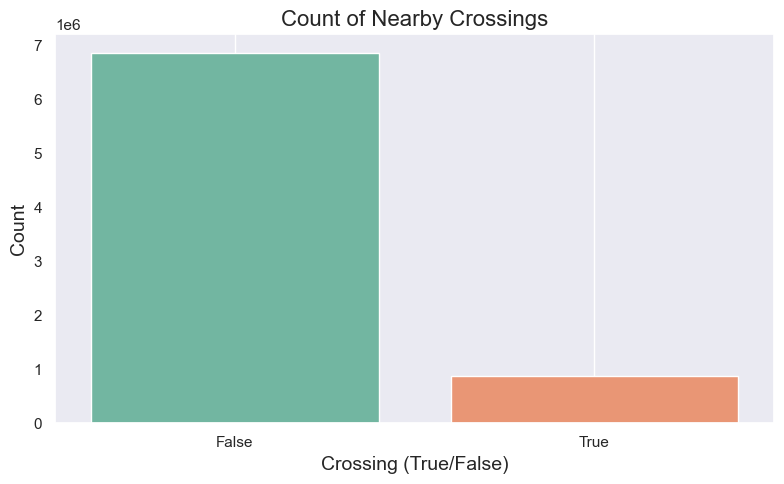

In [123]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df_USA, x='Crossing', palette='Set2')
plt.title('Count of Nearby Crossings', fontsize=16)
plt.xlabel('Crossing (True/False)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=0)
plt.grid()
plt.tight_layout()
plt.show()


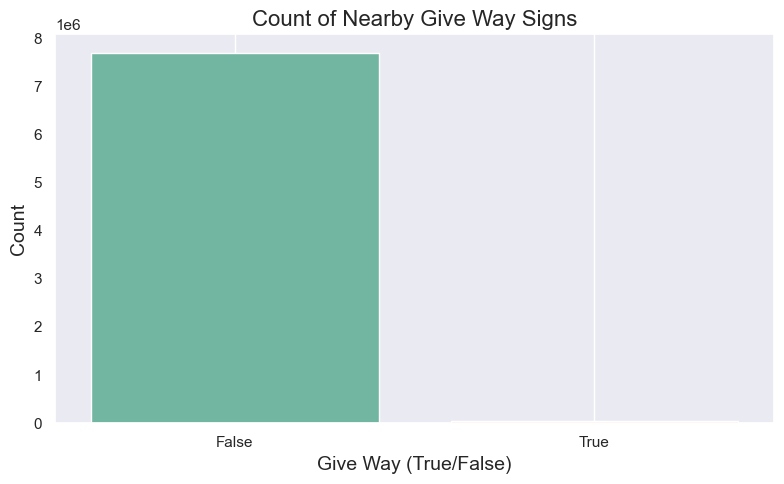

In [125]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df_USA, x='Give_Way', palette='Set2')
plt.title('Count of Nearby Give Way Signs', fontsize=16)
plt.xlabel('Give Way (True/False)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=0)
plt.grid()
plt.tight_layout()
plt.show()


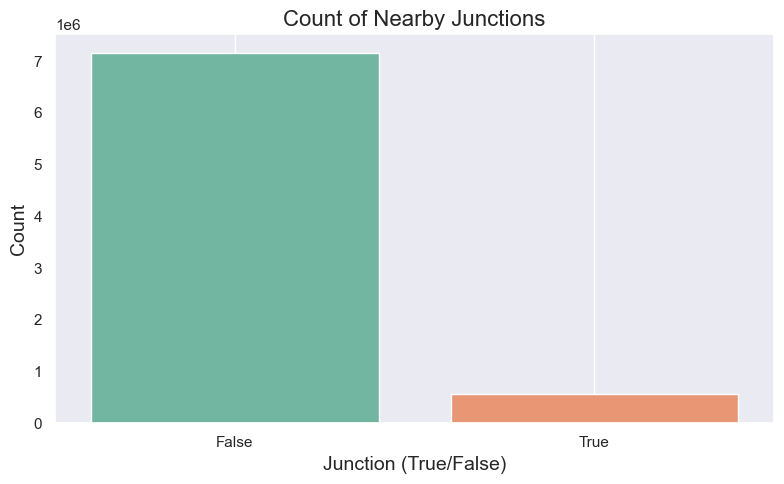

In [127]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df_USA, x='Junction', palette='Set2')
plt.title('Count of Nearby Junctions', fontsize=16)
plt.xlabel('Junction (True/False)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=0)
plt.grid()
plt.tight_layout()
plt.show()


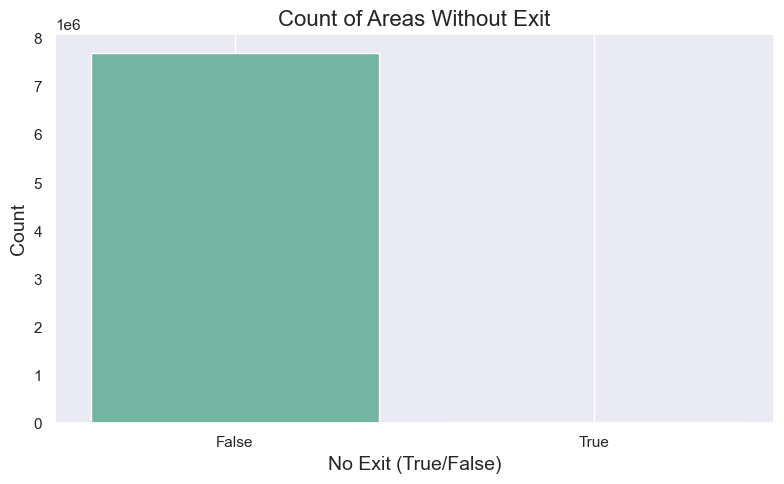

In [129]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df_USA, x='No_Exit', palette='Set2')
plt.title('Count of Areas Without Exit', fontsize=16)
plt.xlabel('No Exit (True/False)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=0)
plt.grid()
plt.tight_layout()
plt.show()


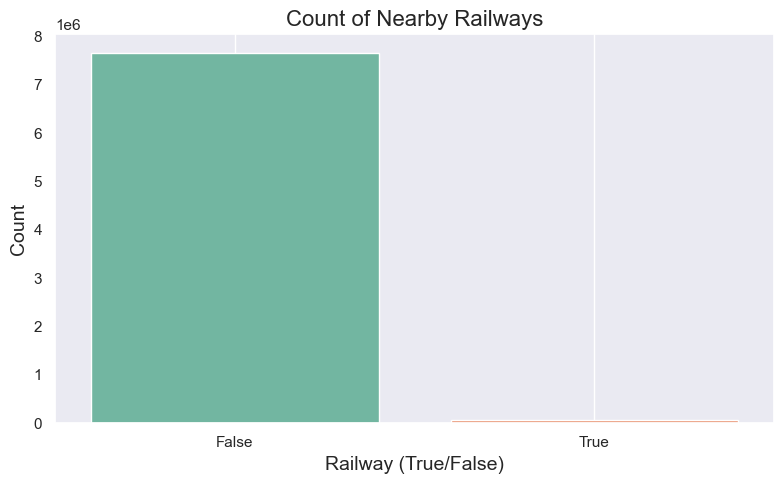

In [131]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df_USA, x='Railway', palette='Set2')
plt.title('Count of Nearby Railways', fontsize=16)
plt.xlabel('Railway (True/False)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=0)
plt.grid()
plt.tight_layout()
plt.show()


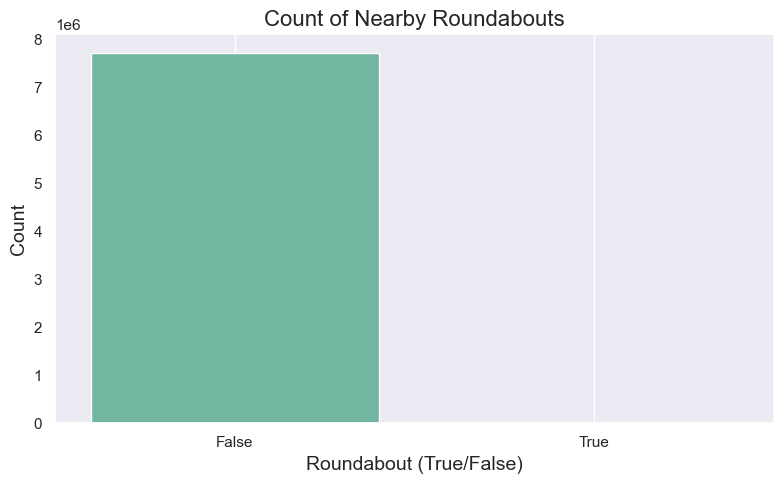

In [133]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df_USA, x='Roundabout', palette='Set2')
plt.title('Count of Nearby Roundabouts', fontsize=16)
plt.xlabel('Roundabout (True/False)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=0)
plt.grid()
plt.tight_layout()
plt.show()


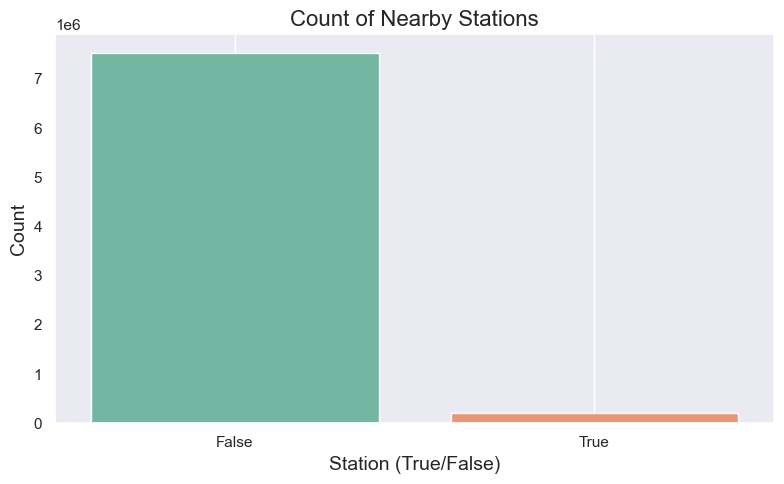

In [135]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df_USA, x='Station', palette='Set2')
plt.title('Count of Nearby Stations', fontsize=16)
plt.xlabel('Station (True/False)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=0)
plt.grid()
plt.tight_layout()
plt.show()


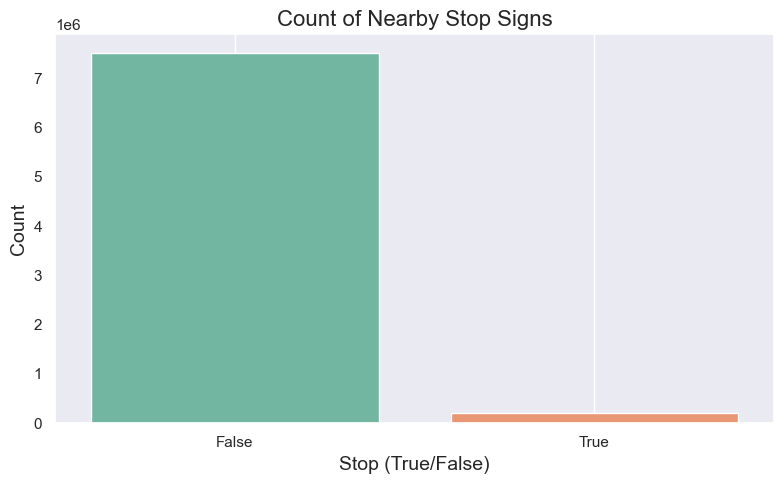

In [137]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df_USA, x='Stop', palette='Set2')
plt.title('Count of Nearby Stop Signs', fontsize=16)
plt.xlabel('Stop (True/False)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=0)
plt.grid()
plt.tight_layout()
plt.show()


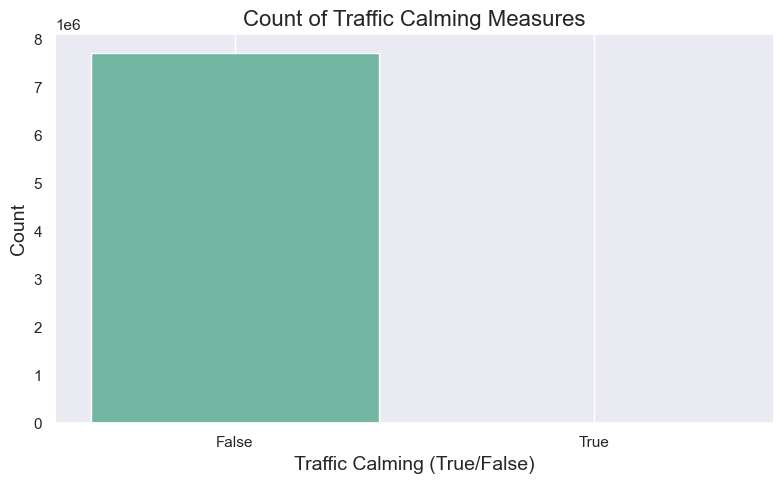

In [139]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df_USA, x='Traffic_Calming', palette='Set2')
plt.title('Count of Traffic Calming Measures', fontsize=16)
plt.xlabel('Traffic Calming (True/False)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=0)
plt.grid()
plt.tight_layout()
plt.show()


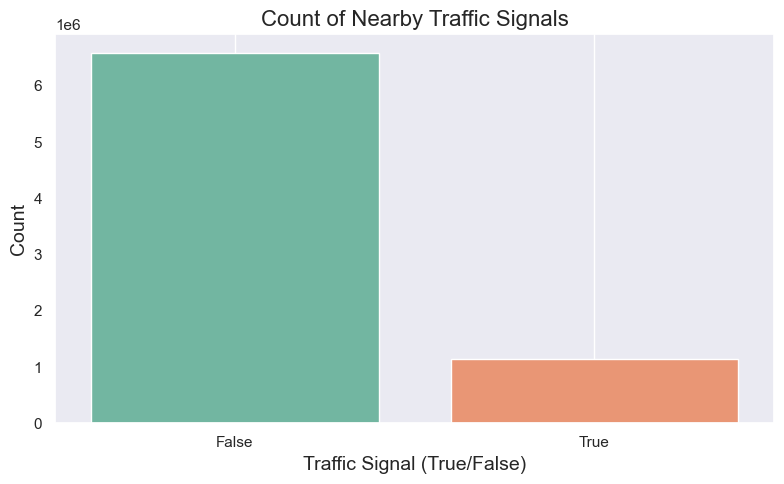

In [141]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df_USA, x='Traffic_Signal', palette='Set2')
plt.title('Count of Nearby Traffic Signals', fontsize=16)
plt.xlabel('Traffic Signal (True/False)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=0)
plt.grid()
plt.tight_layout()
plt.show()
